<a href="https://colab.research.google.com/github/Jayasurya227/-Fast-Tracking-Image-Classification-with-Transfer-Learning/blob/main/Advanced_Vision_AI_Fast_Tracking_Image_Classification_with_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.Data Loading And Preprocessing**

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100

from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_resent50
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_vgg16
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as preprocess_mobilenetv2

(x_train, y_train), (x_test, y_test) = cifar100.load_data()

x_train_resent50 = preprocess_resent50(x_train)
x_test_resent50 = preprocess_resent50(x_test)

x_train_vgg16 = preprocess_vgg16(x_train)
x_test_vgg16 = preprocess_vgg16(x_test)

x_train_mobilenetv2 = preprocess_mobilenetv2(x_train)
x_test_mobilenetv2 = preprocess_mobilenetv2(x_test)

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
print(x_train.shape)
print(x_test_resent50.shape)
print(x_train_vgg16.shape)
print(x_train_mobilenetv2.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 32, 32, 3)
(50000, 32, 32, 3)


**Step 2: Model Preparation**

**2.1  Using ResNet50**

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

#Load pre-trained ResNet50 model without the top player
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

x=GlobalAveragePooling2D()(base_model.output)
x=Dense(1024, activation='relu')(x)
predictions=Dense(100, activation='softmax')(x)

model_resnet50=Model(inputs=base_model.input, outputs=predictions)

model_resnet50.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_resnet50.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 38, 38, 3) │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 16, 16,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 16, 16,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 16, 16,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 18, 18,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 8, 8, 64)  │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 8, 8, 64)  │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 8, 8, 64)  │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 8, 8, 64)  │          0 │ conv2_block1_1_b… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 8, 8, 64)  │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 8, 8, 64)  │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 8, 8, 64)  │          0 │ conv2_block1_2_b… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 8, 8, 256) │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 8, 8, 256) │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 8, 8, 256) │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 8, 8, 256) │      1,024 │ conv2_block1_3_c

 Total params: 25,788,388 (98.37 MB)

 Trainable params: 25,735,268 (98.17 MB)

 Non-trainable params: 53,120 (207.50 KB)

**2.2 Using VGG16**

In [ ]:
#Using VGG16
from tensorflow.keras.applications import ResNet50, VGG16
from tensorflow.keras import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

#Load_pre trained VGG16 model without the top layer
base_model_vgg16=VGG16(weights='imagenet',include_top=False,input_shape=(32,32,3))

#Add new layers
x=GlobalAveragePooling2D()(base_model_vgg16.output)
x=Dense(512, activation='relu')(x)
predictions=Dense(100, activation='softmax')(x)

model_vgg16=Model(inputs=base_model_vgg16.input, outputs=predictions)

model_vgg16.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model_vgg16.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        51,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,028,644 (57.33 MB)

 Trainable params: 15,028,644 (57.33 MB)

 Non-trainable params: 0 (0.00 B)

**2.3 Using MobileNetV2**

In [ ]:
from tensorflow.keras.applications import ResNet50, VGG16, MobileNetV2
from tensorflow.keras import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

#Load_pre trained MobileNetV2 model without the top layer
base_model_MobileNetV2=MobileNetV2(weights='imagenet',include_top=False,input_shape=(32,32,3))

#Add new layers
x=GlobalAveragePooling2D()(base_model_MobileNetV2.output)
x=Dense(512, activation='relu')(x)
predictions=Dense(100, activation='softmax')(x)


model_mobilenetv2=Model(inputs=base_model_MobileNetV2.input, outputs=predictions)

model_mobilenetv2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/tmp/ipython-input-2091695837.py:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model_MobileNetV2=MobileNetV2(weights='imagenet',include_top=False,input_shape=(32,32,3))


**3.Fine-Tuning and Training**

In [ ]:
epochs=3

print('ResNet50:', model_resnet50.layers)
print('VGG16:', model_vgg16.layers)
print('MobileNetV2:', model_mobilenetv2.layers)


#Fine-tune ResNet50
for layer in model_resnet50.layers[:-30]:
  layer.trainable=False

for layer in model_resnet50.layers[-30:]:
  layer.trainable=True

history_resnet50=model_resnet50.fit(x_train_resent50, y_train, epochs=epochs, batch_size=32, validation_data=(x_test_resent50, y_test))

#Fine-tuning VGG16
for layer in model_vgg16.layers[:-5]:
  layer.trainable=False

for layer in model_vgg16.layers[-5:]:
  layer.trainable=True

#Fine-tuning mobilenetv2
for layer in model_mobilenetv2.layers[-40:]:
  layer.trainable=False

for layer in model_mobilenetv2.layers[-40:]:
  layer.trainable=True

mobilenetv2_history=model_mobilenetv2.fit(x_train_mobilenetv2, y_train, epochs=epochs, batch_size=32, validation_data=(x_test_mobilenetv2, y_test))

ResNet50: [<InputLayer name=input_layer_3, built=True>, <ZeroPadding2D name=conv1_pad, built=True>, <Conv2D name=conv1_conv, built=True>, <BatchNormalization name=conv1_bn, built=True>, <Activation name=conv1_relu, built=True>, <ZeroPadding2D name=pool1_pad, built=True>, <MaxPooling2D name=pool1_pool, built=True>, <Conv2D name=conv2_block1_1_conv, built=True>, <BatchNormalization name=conv2_block1_1_bn, built=True>, <Activation name=conv2_block1_1_relu, built=True>, <Conv2D name=conv2_block1_2_conv, built=True>, <BatchNormalization name=conv2_block1_2_bn, built=True>, <Activation name=conv2_block1_2_relu, built=True>, <Conv2D name=conv2_block1_0_conv, built=True>, <Conv2D name=conv2_block1_3_conv, built=True>, <BatchNormalization name=conv2_block1_0_bn, built=True>, <BatchNormalization name=conv2_block1_3_bn, built=True>, <Add name=conv2_block1_add, built=True>, <Activation name=conv2_block1_out, built=True>, <Conv2D name=conv2_block2_1_conv, built=True>, <BatchNormalization name=conv2

**4.Model Evalution**

In [ ]:
from tensorflow.keras.applications import ResNet50, VGG16, MobileNetV2

acc_resnet50=model_resnet50.evaluate(x_test_resent50, y_test, verbose=0)[1]
acc_vgg16=model_vgg16.evaluate(x_test_vgg16, y_test, verbose=0)[1]
acc_mobilenetv2=model_mobilenetv2.evaluate(x_test_mobilenetv2, y_test, verbose=0)[1]

print(f'ResNet50 Accuracy: {acc_resnet50:.2f}%')
print(f'VGG16 Accuracy: {acc_vgg16:.2f}%')
print(f'MobileNetV2 Accuracy: {acc_mobilenetv2:.2f}%')

ResNet50 Accuracy: 0.44%
VGG16 Accuracy: 0.01%
MobileNetV2 Accuracy: 0.26%


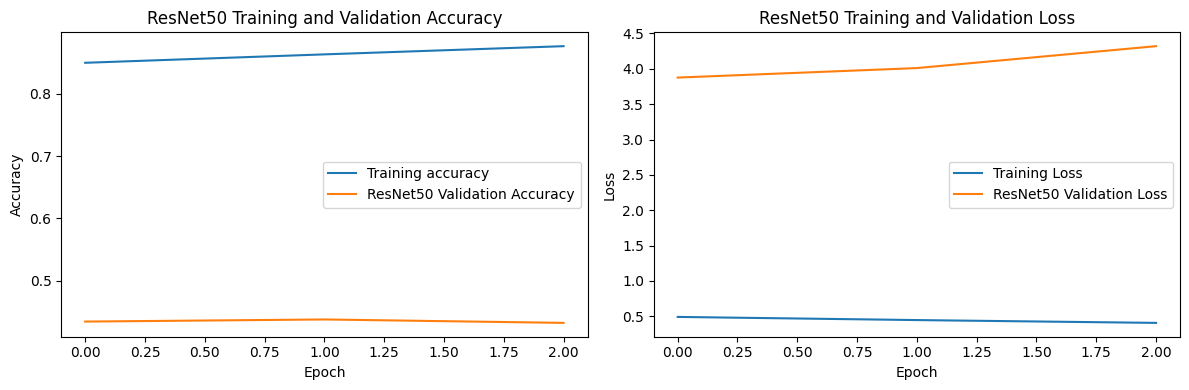

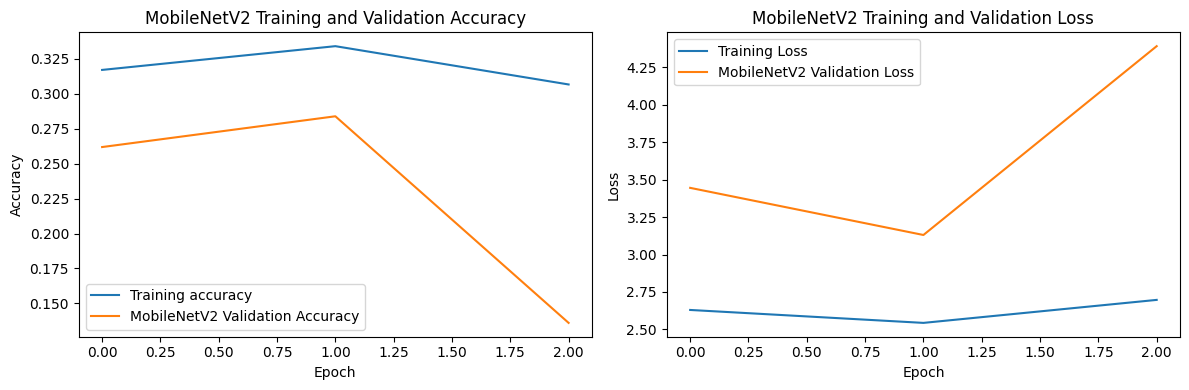

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history, model_name):
    plt.figure(figsize=(12, 4))

    # plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training accuracy')
    plt.plot(history.history['val_accuracy'], label=f'{model_name} Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(f'{model_name} Training and Validation Accuracy')

    # plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label=f'{model_name} Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f'{model_name} Training and Validation Loss')

    plt.tight_layout()
    plt.show()

# Plot history for trained models
plot_history(history_resnet50, 'ResNet50')
plot_history(mobilenetv2_history, 'MobileNetV2')

In [ ]:
history_resnet50=model_resnet50.fit(x_train_resent50, y_train, epochs=epochs, batch_size=32, validation_data=(x_test_resent50, y_test))

Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.8922 - loss: 0.3546 - val_accuracy: 0.4374 - val_loss: 4.4839
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.8953 - loss: 0.3571 - val_accuracy: 0.4364 - val_loss: 4.6392
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.8960 - loss: 0.3518 - val_accuracy: 0.4337 - val_loss: 4.7833
